# Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Activation

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

from tensorflow.keras import backend


In [2]:
from platform import python_version
import matplotlib, sklearn

# Compare currently installed versions
print('Compare current versions of installed libraries to the ones used to create this notebook:')
print(f'Current Python version: {python_version()}')
print('Used Python version   : 3.9.15', end=' ')
print('----> Matched.') if python_version() == '3.9.15' else print('----> Not matched.')   
print('*'*70)
used_library_version = [
    (pd, 'Pandas','1.5.2'), 
    (np,'Numpy','1.22.3'), 
    (matplotlib, 'Matplotlib','3.6.3'), 
    (sns, 'Seaborn','0.12.1'),
    (sklearn, 'sklearn', '1.1.3'),
    (tf, 'tensorflow', '2.9.1')
]

compare_version = pd.DataFrame({
    '  Library':        [lib_name                    for lib, lib_name, used_ver in used_library_version],
    '  Installed ver.': [lib.__version__             for lib, lib_name, used_ver in used_library_version],
    '  Used ver.':      [used_ver                    for lib, lib_name, used_ver in used_library_version],
    '  Version match?': [lib.__version__ == used_ver for lib, lib_name, used_ver in used_library_version]
    })
print(compare_version)

Compare current versions of installed libraries to the ones used to create this notebook:
Current Python version: 3.9.15
Used Python version   : 3.9.15 ----> Matched.
**********************************************************************
      Library   Installed ver.   Used ver.    Version match?
0      Pandas            1.5.2       1.5.2              True
1       Numpy           1.22.3      1.22.3              True
2  Matplotlib            3.6.3       3.6.3              True
3     Seaborn           0.12.1      0.12.1              True
4     sklearn            1.1.3       1.1.3              True
5  tensorflow            2.9.1       2.9.1              True


### Dataset

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Define data path
Note: 

This notebook was trained on my local PC with GPU instead of Google Colab.

Prior to running this notebook:
- extracted Train and Test folders from the CNN_assignment.zip
- placed Train/Test folders in "data" folder, in the same directory with the notebook file

In [2]:
# check GPU
print("Using GPU: ", tf.config.list_physical_devices('GPU'))

Using GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path("data/Train")
data_dir_test = pathlib.Path('data/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


#### If using colab
I did not use Colab, but if I had, the code would look like below

In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [6]:
# data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Colab/Melanoma/data/Train')
# data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab/Melanoma/data/Test')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = data_dir_train,
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'training'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = data_dir_train,
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

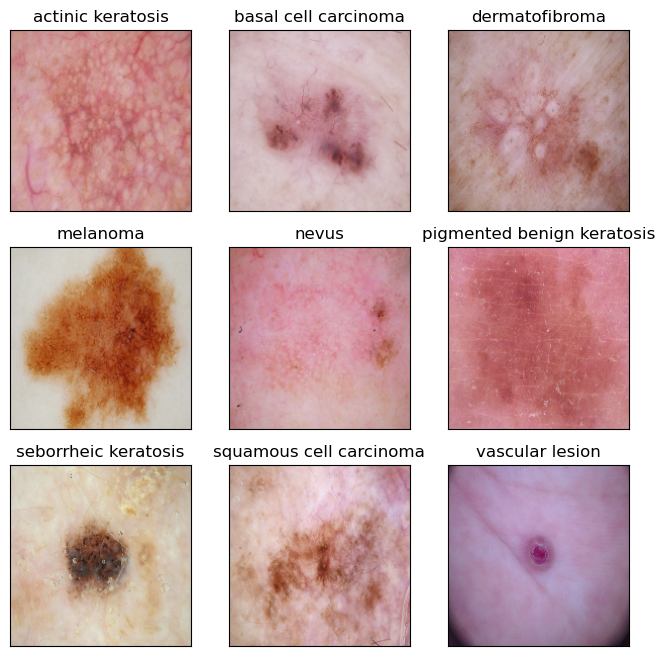

In [11]:
### your code goes here, you can use training or validation data to visualize

# select 1 sample from each of 9 classes
img_list = []
label_list = []
for batch in list(train_ds.as_numpy_iterator()):
    for image, label in zip(batch[0], batch[1]):
        if np.argmax(label) not in label_list:
            img_list.append(image.astype(int))
            label_list.append(np.argmax(label))
    # break when have enough 9 samples
    if len(label_list)==9:
        break

# plot 9 classes
fig = plt.figure(figsize=(8,8))
for image, label in zip(img_list,label_list):
    ax = fig.add_subplot(3, 3, 1 + label, xticks=[], yticks=[])
    ax.set_title(class_names[label])
    plt.imshow(image)
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here

model = Sequential()
# input and scale
model.add(Rescaling(1./255, input_shape=(180, 180, 3)))

# 1st convo
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
# 2nd convo
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
# 1st Maxpooling and dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# 3rd convo
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

# 2nd Maxpooling and dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FC layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

# Output
## Number of classes is 9
model.add(Dense(9, activation = 'softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # categorical_crossentropy because the target is already hot encoded during dataset creation
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 71ms/step - loss: 2.4447 - accuracy: 0.1724 - val_loss: 2.0162 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 54ms/step - loss: 1.9849 - accuracy: 0.2511 - val_loss: 1.9139 - val_accuracy: 0.3445
Epoch 3/20
56/56 [==============================] - 3s 54ms/step - loss: 1.7719 - accuracy: 0.3449 - val_loss: 1.8517 - val_accuracy: 0.3087
Epoch 4/20
56/56 [==============================] - 3s 55ms/step - loss: 1.7767 - accuracy: 0.3750 - val_loss: 1.7692 - val_accuracy: 0.3468
Epoch 5/20
56/56 [==============================] - 3s 55ms/step - loss: 1.5665 - accuracy: 0.4420 - val_loss: 1.6975 - val_accuracy: 0.3893
Epoch 6/20
56/56 [==============================] - 3s 54ms/step - loss: 1.4294 - accuracy: 0.5028 - val_loss: 1.4728 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 3s 54ms/step - loss: 1.3215 - accuracy: 0.5340 - val_loss: 1.6740 - val_accuracy: 0.4362
Epoch 8/20
5

### Visualizing training results

In [17]:
def training_result(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

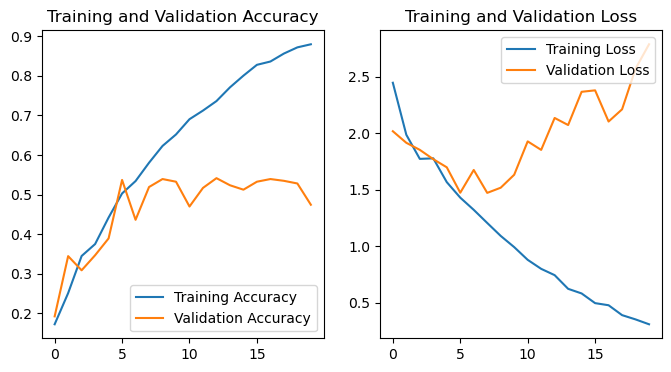

In [18]:
training_result(history, epochs)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The model mostly shows signs of overfitting to the training set. 
- Training accuracy is about 70% ~ 80%, yet validation accuracy stopped improving and stuck around 50% after a few epochs.
- Training loss kept going down while validation loss first went down then slowly increased.

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here


# import augmentation layers
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# create augmentator
data_augment = keras.Sequential([
    RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    RandomRotation(0.5, fill_mode='reflect'),
    RandomZoom((-0.3, 0.2), fill_mode='reflect')
]    )

- fill_mode = reflect: to retain the pattern/texture of the skin in the filled area. constant/nearest just fill with constant/edge values.
- rotation: flexible for large degree,
- random zoom: allow for zoom in up to 30% and zoom out up to 20%.

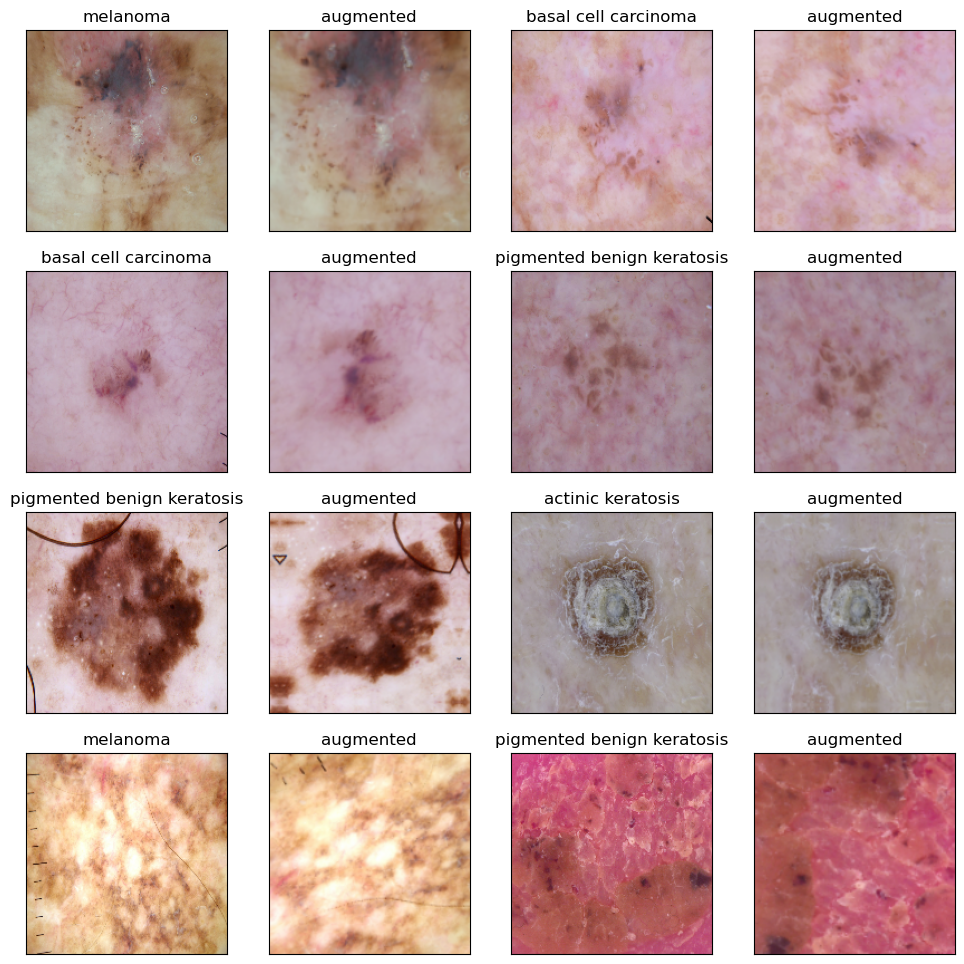

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

backend.clear_session()

# apply data augmentation
for batch_data, batch_label in train_ds.take(1):
    images_original = batch_data.numpy()
    images_augmented = data_augment(batch_data).numpy()
    labels = batch_label.numpy().argmax(axis=1)
    
# show the first 8 before-after augmentation
fig = plt.figure(figsize=(12,12))
for i in range(8):
    #before augmented
    ax = fig.add_subplot(4, 4, i*2+1, xticks=[], yticks=[]) 
    ax.set_title(class_names[labels[i]])
    plt.imshow(images_original[i].astype(int))
    # after augmented
    ax = fig.add_subplot(4, 4, i*2+2, xticks=[], yticks=[]) 
    ax.set_title('augmented')
    plt.imshow(images_augmented[i].astype(int))
plt.show()    

### Todo:
### Create the model, compile and train the model


In [21]:
## Your code goes here
model = Sequential()
# input and scale
model.add(Rescaling(1./255, input_shape=(180, 180, 3)))

# data augmentation layers
model.add(RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)))
model.add(RandomRotation(0.5, fill_mode='reflect'))
model.add(RandomZoom((-0.3, 0.2), fill_mode='reflect'))

# 1st convo
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
# 2nd convo
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
# 1st Maxpooling and dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd convo
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

# 2nd Maxpooling and dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FC layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

# Output
## Number of classes is 9
model.add(Dense(9, activation = 'softmax'))

### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 90ms/step - loss: 3.0815 - accuracy: 0.2467 - val_loss: 1.9420 - val_accuracy: 0.3848
Epoch 2/20
56/56 [==============================] - 5s 88ms/step - loss: 1.8060 - accuracy: 0.3510 - val_loss: 1.7767 - val_accuracy: 0.3758
Epoch 3/20
56/56 [==============================] - 5s 87ms/step - loss: 1.6945 - accuracy: 0.4152 - val_loss: 1.5985 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 5s 88ms/step - loss: 1.5529 - accuracy: 0.4520 - val_loss: 1.5323 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 5s 91ms/step - loss: 1.4973 - accuracy: 0.4799 - val_loss: 1.5238 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 5s 89ms/step - loss: 1.4928 - accuracy: 0.4671 - val_loss: 1.4425 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 5s 88ms/step - loss: 1.4777 - accuracy: 0.4877 - val_loss: 1.4305 - val_accuracy: 0.4899
Epoch 8/20
56

### Visualizing the results

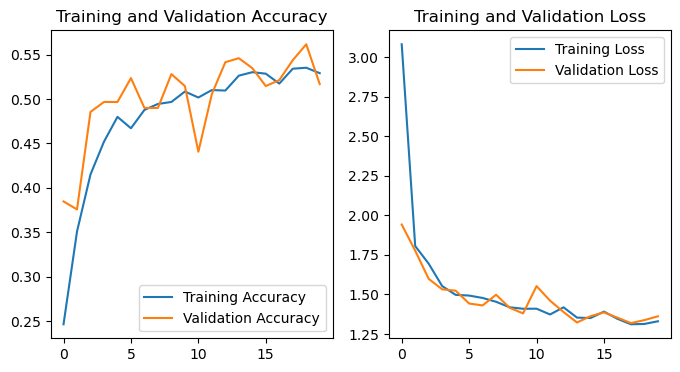

In [24]:
training_result(history, epochs)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
- Applying data augmentation helped with overfitting. Now both training accuracy and validation accuracy are very similar.
- While clearing overfitting, the model might be underfitted. Due to very small training sample, the model could not capture well the underlying patterns of all classes, lead to low accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

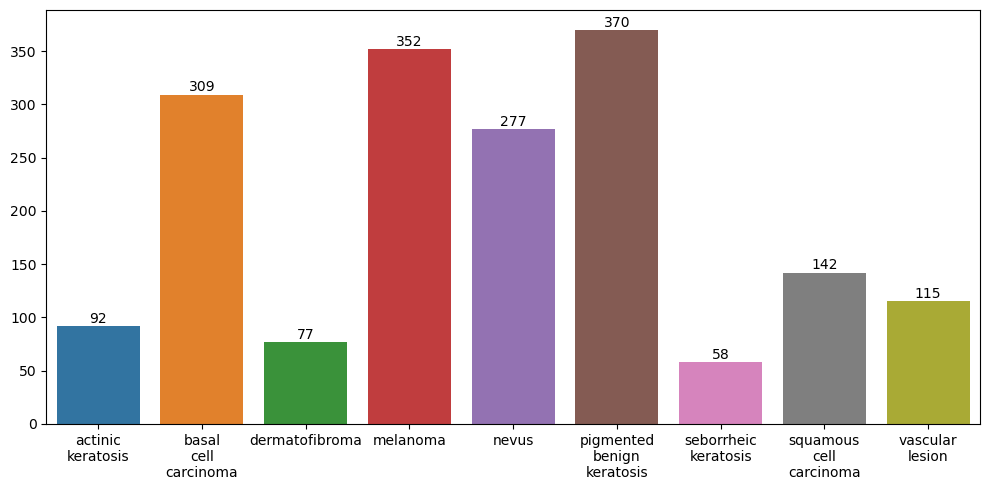

In [25]:
## Your code goes here.
class_distribution = np.sum(np.concatenate([batch_labels.numpy() for batch_data, batch_labels in train_ds]), axis=0)

plt.figure(figsize=(10,5))
sns.barplot(y=class_distribution, x = ['\n'.join(name.split(' ')) for name in class_names])
for i, count in enumerate(class_distribution):
    plt.annotate(round(count), xy=(i,count+3), ha='center')
plt.tight_layout()
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
**Seborrheic keratosis** has the lowest number of sample (58).
#### - Which classes dominate the data in terms proportionate number of samples?
**Pigmented benign keratosis** (370) and **melanoma** (352) dominate the data proportionally.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
# Already installed
# !pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset = 'data/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to data/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CDDA856160>: 100%|██████████| 500/500 [00:02<00:00, 218.56 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to data/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CDDDAE95E0>: 100%|██████████| 500/500 [00:02<00:00, 216.41 Samples/s]


Initialised with 95 image(s) found.
Output directory set to data/Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CDDD6B8CD0>: 100%|██████████| 500/500 [00:02<00:00, 218.26 Samples/s]


Initialised with 438 image(s) found.
Output directory set to data/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1CC55CE8880>: 100%|██████████| 500/500 [00:14<00:00, 34.51 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to data/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=959x639 at 0x1CC5B40F6D0>: 100%|██████████| 500/500 [00:11<00:00, 43.81 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to data/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CD65D8C520>: 100%|██████████| 500/500 [00:02<00:00, 214.79 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to data/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1CDD1256970>: 100%|██████████| 500/500 [00:05<00:00, 88.05 Samples/s]                   


Initialised with 181 image(s) found.
Output directory set to data/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CC62E38AC0>: 100%|██████████| 500/500 [00:02<00:00, 210.78 Samples/s]


Initialised with 139 image(s) found.
Output directory set to data/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CD65DA2B50>: 100%|██████████| 500/500 [00:02<00:00, 216.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
from glob import glob

In [30]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,data\Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,data\Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,data\Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,data\Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,data\Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,data\Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,data\Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,data\Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,data\Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


In [31]:
# append the new images
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df,df2])

In [32]:
# count samples in each class
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
data_dir_train = pathlib.Path("data/Train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = data_dir_train,
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'training')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = data_dir_train,
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'validation'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
model = Sequential()
# input and scale
model.add(Rescaling(1./255, input_shape=(180, 180, 3)))

# 1st convo
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
# 2nd convo
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
# 1st Maxpooling and dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd convo
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

# 2nd Maxpooling and dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FC layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

# Output
## Number of classes is 9
model.add(Dense(9, activation = 'softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

Note: for this final model, starter notebook instruct to train for 50 epochs while Upgrad's evaluation rubric instructed to use 20. I decided to train for 50 epochs, since with only 20, the model seems to be underfitting.

In [38]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 16s 85ms/step - loss: 2.2725 - accuracy: 0.1619 - val_loss: 1.9777 - val_accuracy: 0.2918
Epoch 2/50
169/169 [==============================] - 13s 77ms/step - loss: 1.8050 - accuracy: 0.3064 - val_loss: 1.5648 - val_accuracy: 0.4001
Epoch 3/50
169/169 [==============================] - 13s 77ms/step - loss: 1.6378 - accuracy: 0.3565 - val_loss: 1.4495 - val_accuracy: 0.4254
Epoch 4/50
169/169 [==============================] - 13s 76ms/step - loss: 1.5356 - accuracy: 0.3967 - val_loss: 1.4115 - val_accuracy: 0.4380
Epoch 5/50
169/169 [==============================] - 13s 76ms/step - loss: 1.4291 - accuracy: 0.4416 - val_loss: 1.3682 - val_accuracy: 0.4417
Epoch 6/50
169/169 [==============================] - 13s 76ms/step - loss: 1.3669 - accuracy: 0.4598 - val_loss: 1.2872 - val_accuracy: 0.4863
Epoch 7/50
169/169 [==============================] - 13s 76ms/step - loss: 1.3255 - accuracy: 0.4735 - val_loss: 1.2727 - val_accuracy:

#### **Todo:**  Visualize the model results

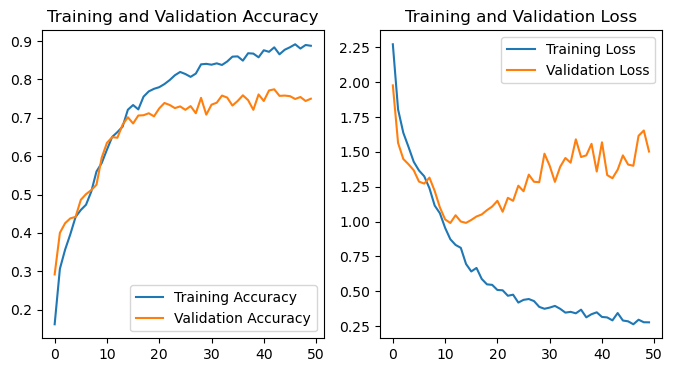

In [39]:
training_result(history, epochs)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- Class rebalance seems to help improving underfitting. Both train/val accuracy went from ~60% to 80% ~ 90%.
- The model is only slightly overfitted, since validation accuracy is still behind train accuracy and could not go higher than 80%. This can be improved further by hyperparameter tuning, changing model architecture, get more training data, etc...
